## 导入所需库

In [10]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## 加载波士顿房价数据集并提取特征和目标变量

In [ ]:
dataset = load_boston()  # 加载数据集
print(dataset.keys())  # 查看数据集中的键名

x_data = dataset.data  # 存储从数据集中提取的特征变量（自变量）。
y_data = dataset.target  # 存储从数据集中提取的目标变量（因变量）
name_data = dataset.feature_names  # 包含了特征变量的名称。在波士顿房价数据集中，这些名称对应着各个特征。


## 将数据集拆分为训练集和测试集

In [12]:

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1001)


## 初始化特征和目标变量的标准化器并对训练集和测试集进行标准化处理

In [13]:

sc_X = StandardScaler()
sc_y = StandardScaler()


x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

y_train = sc_y.fit_transform(y_train.reshape(-1, 1))
y_test = sc_y.transform(y_test.reshape(-1,1))


## 重塑目标变量的形状，将多维数组降为一维

In [14]:
y_train = y_train.ravel()#ravel()将多维数组降为一维
y_test = y_test.ravel()


## 创建回归估计器实例，并选择平方误差作为损失函数

In [ ]:

sgd_model = SGDRegressor(loss='squared_loss', max_iter=250, verbose=1, learning_rate='constant', eta0=0.01)#创建模型,verbose=1表示打印训练过程中的信息,learning_rate='constant'表示使用常数学习率,eta0=0.01表示学习率为0.01,loss='squared_loss'表示使用平方损失函数,max_iter=250表示最大迭代次数为250
sgd_model.fit(x_train, y_train)  # 使用训练数据拟合模型
y_test_p = sgd_model.predict(x_test)  # 使用拟合好的模型对测试集进行预测


## 计算回归模型的确定系数（coefficient of determination）
确定系数是衡量回归模型拟合优度的指标，其取值范围在0到1之间。该值越接近1，表示模型对观测数据的解释能力越强，拟合效果越好；而越接近0，则表示模型的解释能力较弱，拟合效果较差。

In [16]:
r_squared = sgd_model.score(x_test, y_test)
print('R2 = %s' % r_squared)

R2 = 0.6463183961910159


## 绘制散点图
该散点图展示了房间数量（x轴）和价格（y轴）之间的关系，其中使用蓝色方块表示预测的房价，红色叉表示实际的房价。

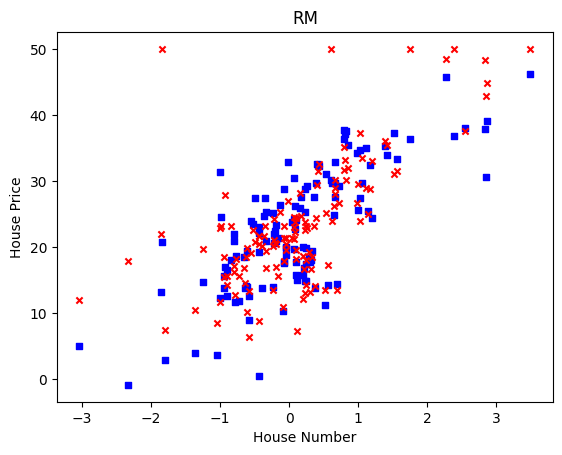

In [17]:

plt.subplot(1, 1, 1)
y_test_p = sc_y.inverse_transform(y_test_p.reshape(-1, 1))
y_test = sc_y.inverse_transform(y_test.reshape(-1, 1))

plt.scatter(x_test[:, 5], y_test_p, s=20, color="b", marker='s')
plt.scatter(x_test[:, 5], y_test, s=20, color="r", marker='x')

plt.xlabel('House Number')
plt.ylabel('House Price')
plt.title(name_data[5])
plt.show()
